In [1]:
# How to validate ongoing learning?

# Here implemented method:
# - load current model
# - simulate a number of games with random moves initially to get random positions
# - played out deterministically based on current model
# - calculate mean difference between model values and what would be the MC-reward (discounted -1 / 1)
# - keep track of these errors for either only decisive games or all games

In [2]:
import numpy as np
import time
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, random_split
import torch.optim as optim
import matplotlib.pyplot as plt
import sys, os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(project_root)

from Resources.Model import Model_v28
from Resources.Game import *


In [34]:
model = Model_v28()
model_saves = os.listdir('../Monte Carlo/Model Saves MC v28')
if len(model_saves) > 0:
    newest_model = max(int(i[6:-8]) for i in model_saves)
    latest_batch_index = newest_model
    model.load_state_dict(torch.load('../Monte Carlo/Model Saves MC v28/model_{}_batches'.format(newest_model)))
criterion = nn.MSELoss()

n_games         = 10 # number of games per model load
n_random_moves  = 5 # number of random moves per player in the beginning
use_draws       = False
gamma           = 0.98 

draws = 0
white_wins = 0
black_wins = 0

In [35]:
val_mean_list = []
val_median_list = []
val_std_list = []

curr_ind = 0

validation_error_list = []
hist_active_1 = []
hist_active_20 = []
hist_active_50 = []
hist_active_100 = []
hist_active_150 = []


10 :  10
validation error for model_batch 10: 0.241550475358963
10 :  10
validation error for model_batch 20: 0.6243828535079956
10 :  10
validation error for model_batch 30: 0.9623054265975952
10 :  10
validation error for model_batch 40: 0.9342820644378662
10 :  10
validation error for model_batch 50: 0.3671109676361084
10 :  10
validation error for model_batch 60: 0.7931801676750183
10 :  10
validation error for model_batch 70: 0.49135875701904297
10 :  10
validation error for model_batch 80: 0.4331069886684418
10 :  10
validation error for model_batch 90: 0.604252278804779
10 :  10
validation error for model_batch 100: 0.9164040684700012


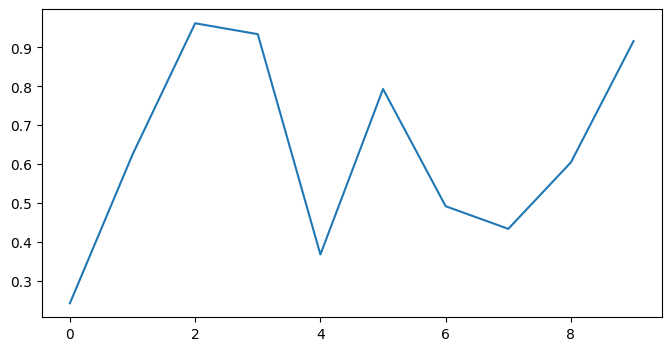

10 :  10
validation error for model_batch 110: 0.4495495557785034
10 :  9
validation error for model_batch 120: 0.5267883539199829
10 :  10
validation error for model_batch 130: 0.3826248049736023
10 :  10
validation error for model_batch 140: 0.7570761442184448
10 :  10
validation error for model_batch 150: 0.29554539918899536
10 :  10
validation error for model_batch 160: 0.5083417892456055
10 :  10
validation error for model_batch 170: 1.5055867433547974
10 :  10
validation error for model_batch 180: 0.3456322252750397
10 :  10
validation error for model_batch 190: 0.5096955895423889
10 :  10
validation error for model_batch 200: 0.8000723123550415


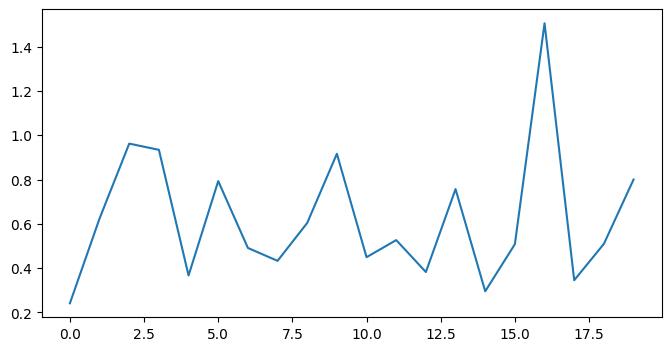

10 :  10
validation error for model_batch 210: 0.6333584785461426
10 :  10
validation error for model_batch 220: 0.47791481018066406
10 :  10
validation error for model_batch 230: 0.5096936821937561
10 :  10
validation error for model_batch 240: 0.5294646620750427
10 :  10
validation error for model_batch 250: 0.5978114604949951
10 :  10
validation error for model_batch 260: 0.25532564520835876
10 :  10
validation error for model_batch 270: 0.47296151518821716
10 :  10
validation error for model_batch 280: 0.3427376449108124
10 :  10
validation error for model_batch 290: 0.5855914950370789
10 :  10
validation error for model_batch 300: 0.545707643032074


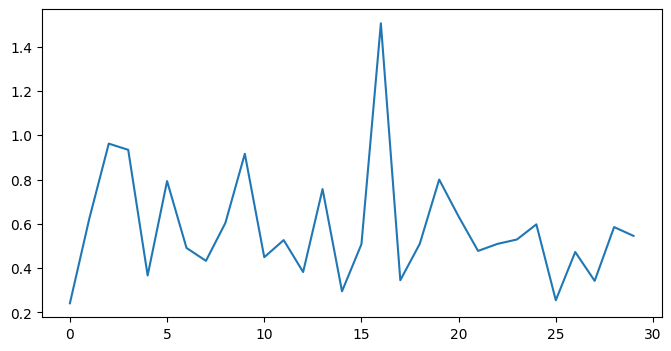

10 :  10
validation error for model_batch 310: 0.5141490697860718
10 :  10
validation error for model_batch 320: 0.6667627692222595
10 :  10
validation error for model_batch 330: 0.2640158236026764
10 :  10
validation error for model_batch 340: 0.4557901620864868
10 :  10
validation error for model_batch 350: 0.45196565985679626
10 :  10
validation error for model_batch 360: 0.28995731472969055
10 :  10
validation error for model_batch 370: 0.370663583278656
10 :  10
validation error for model_batch 380: 0.4911554455757141
10 :  10
validation error for model_batch 390: 0.417154461145401
10 :  9
validation error for model_batch 400: 0.426991730928421


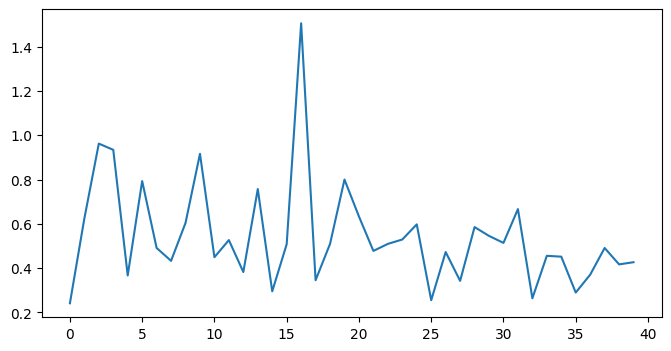

10 :  9
validation error for model_batch 410: 0.35129931569099426
10 :  10
validation error for model_batch 420: 0.2867846190929413
10 :  9
validation error for model_batch 430: 0.4924447536468506
10 :  9
validation error for model_batch 440: 0.4606567621231079
10 :  10
validation error for model_batch 450: 0.5879940390586853
10 :  10
validation error for model_batch 460: 0.4034656286239624
10 :  9
validation error for model_batch 470: 1.0592297315597534
10 :  10
validation error for model_batch 480: 0.46209976077079773
10 :  10
validation error for model_batch 490: 0.8207855224609375
10 :  10
validation error for model_batch 500: 0.48615124821662903


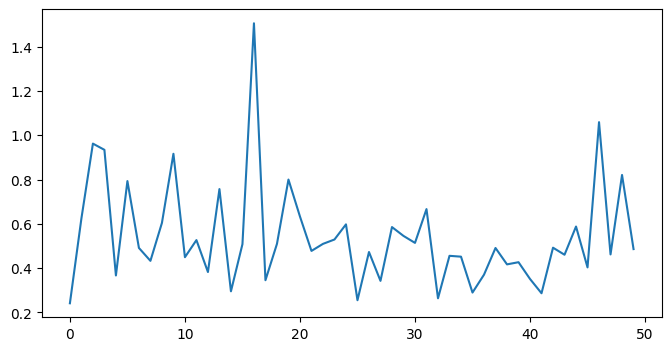

10 :  10
validation error for model_batch 510: 0.48688390851020813
10 :  10
validation error for model_batch 520: 0.5091583132743835
10 :  10
validation error for model_batch 530: 0.3309890031814575
10 :  10
validation error for model_batch 540: 0.7533740401268005
10 :  10
validation error for model_batch 550: 0.5551797151565552
10 :  10
validation error for model_batch 560: 0.4597184956073761
10 :  10
validation error for model_batch 570: 0.6199453473091125
10 :  10
validation error for model_batch 580: 0.3487429916858673
10 :  10
validation error for model_batch 590: 0.3287622928619385
10 :  10
validation error for model_batch 600: 0.4446827471256256


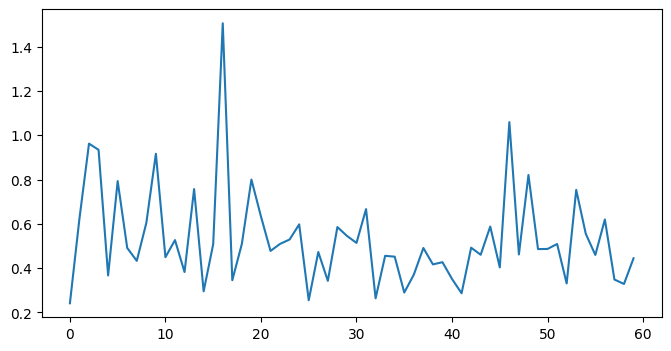

10 :  10
validation error for model_batch 610: 0.4527949392795563
10 :  9
validation error for model_batch 620: 0.738276481628418
10 :  10
validation error for model_batch 630: 1.1017760038375854
10 :  9
validation error for model_batch 640: 0.29786550998687744
10 :  10
validation error for model_batch 650: 0.7550206184387207
10 :  10
validation error for model_batch 660: 0.5213502645492554
10 :  10
validation error for model_batch 670: 0.2784634232521057
10 :  10
validation error for model_batch 680: 0.29752957820892334
10 :  10
validation error for model_batch 690: 0.2604922950267792
10 :  10
validation error for model_batch 700: 0.3612337112426758


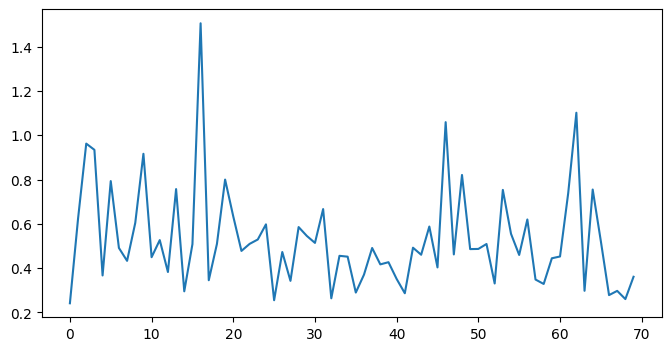

10 :  9
validation error for model_batch 710: 0.43159914016723633
10 :  10
validation error for model_batch 720: 0.3735845386981964
10 :  10
validation error for model_batch 730: 0.3885090947151184
10 :  10
validation error for model_batch 740: 0.487664133310318
10 :  10
validation error for model_batch 750: 0.6141148209571838
10 :  10
validation error for model_batch 760: 0.40411269664764404
10 :  10
validation error for model_batch 770: 0.21073587238788605
10 :  9
validation error for model_batch 780: 0.4298129379749298
10 :  10
validation error for model_batch 790: nan
10 :  10
validation error for model_batch 800: 0.30621570348739624


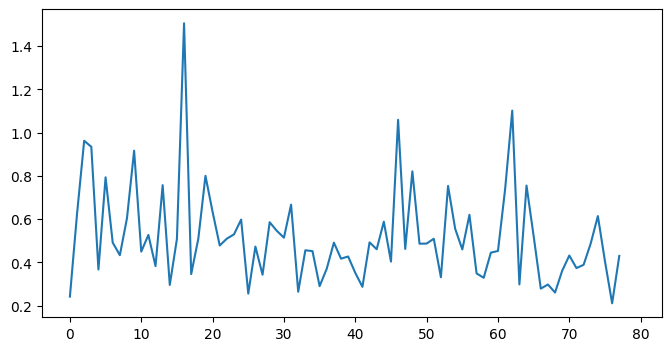

10 :  10
validation error for model_batch 810: 0.36948642134666443
10 :  10
validation error for model_batch 820: 0.5465141534805298
10 :  10
validation error for model_batch 830: 0.5084868669509888
10 :  10
validation error for model_batch 840: 0.41374585032463074
10 :  10
validation error for model_batch 850: 0.26373523473739624
10 :  9
validation error for model_batch 860: 0.359967976808548
10 :  10
validation error for model_batch 870: 0.11467844247817993
10 :  10
validation error for model_batch 880: 0.5259267091751099
10 :  9
validation error for model_batch 890: 0.36806073784828186
10 :  10
validation error for model_batch 900: 0.290355384349823


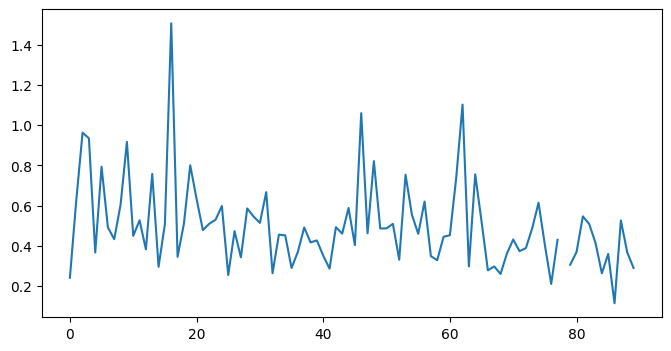

10 :  10
validation error for model_batch 910: 0.4943806231021881
10 :  9
validation error for model_batch 920: 0.3459931015968323
10 :  9
validation error for model_batch 930: 0.36360853910446167
10 :  10
validation error for model_batch 940: 0.44746288657188416
10 :  10
validation error for model_batch 950: 0.6034347414970398
10 :  9
validation error for model_batch 960: 0.2686823904514313
10 :  10
validation error for model_batch 970: 0.3771774470806122
10 :  10
validation error for model_batch 980: 0.5153006911277771
10 :  10
validation error for model_batch 990: 0.6522220373153687
10 :  10
validation error for model_batch 1000: 0.7093164920806885


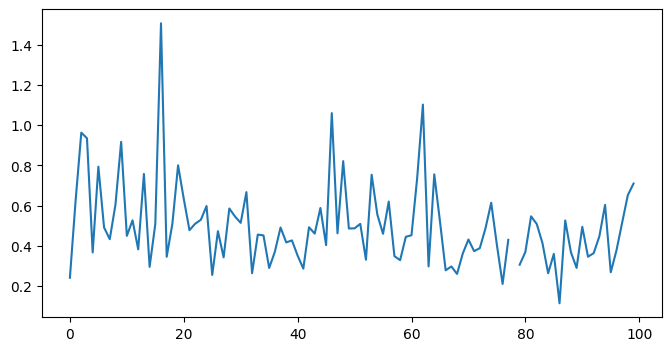

10 :  10
validation error for model_batch 1010: 0.5519548654556274
10 :  10
validation error for model_batch 1020: 0.34259286522865295
10 :  10
validation error for model_batch 1030: 0.5907630920410156
10 :  10
validation error for model_batch 1040: 0.43297335505485535
10 :  10
validation error for model_batch 1050: 0.28438273072242737
10 :  10
validation error for model_batch 1060: 0.4115242063999176
10 :  10
validation error for model_batch 1070: 0.5661718845367432
10 :  10
validation error for model_batch 1080: 0.5134313702583313
10 :  10
validation error for model_batch 1090: 0.4753672480583191
10 :  10
validation error for model_batch 1100: 0.33627796173095703


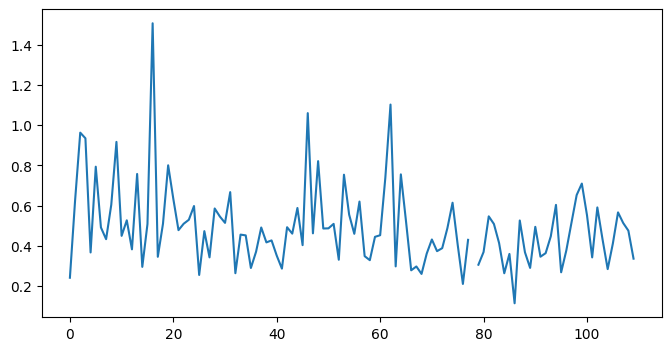

10 :  10
validation error for model_batch 1110: 1.0343468189239502
10 :  9
validation error for model_batch 1120: 0.31009870767593384
10 :  9
validation error for model_batch 1130: 0.5657240152359009
10 :  10
validation error for model_batch 1140: 0.30716487765312195
10 :  8
validation error for model_batch 1150: 0.21307270228862762
10 :  10
validation error for model_batch 1160: 0.4155934453010559
10 :  10
validation error for model_batch 1170: 0.2344132363796234
10 :  10
validation error for model_batch 1180: 0.43473371863365173
10 :  10
validation error for model_batch 1190: 0.3194696307182312
10 :  10
validation error for model_batch 1200: 0.2877945005893707


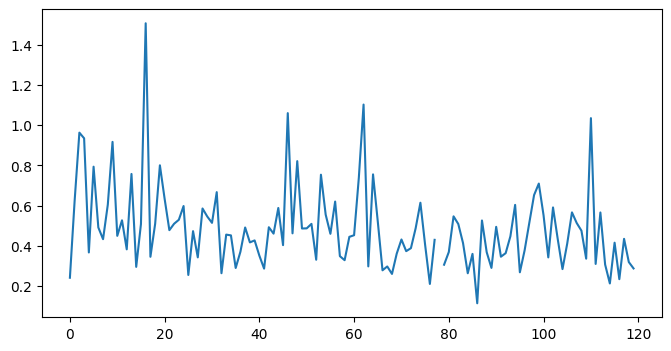

10 :  10
validation error for model_batch 1210: 0.31644654273986816
10 :  10
validation error for model_batch 1220: 0.6454911231994629
10 :  10
validation error for model_batch 1230: 0.41888993978500366
10 :  10
validation error for model_batch 1240: 0.6304965019226074
10 :  10
validation error for model_batch 1250: 0.27078405022621155
10 :  10
validation error for model_batch 1260: 0.6824778318405151
10 :  10
validation error for model_batch 1270: 0.5289085507392883
10 :  10
validation error for model_batch 1280: 0.542073667049408
10 :  10
validation error for model_batch 1290: 0.4401562511920929
10 :  10
validation error for model_batch 1300: 0.0962752029299736


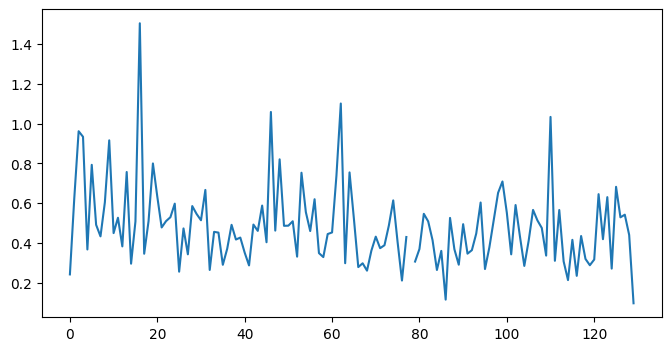

10 :  10
validation error for model_batch 1310: 0.31024178862571716
10 :  10
validation error for model_batch 1320: 0.4471331834793091
10 :  10
validation error for model_batch 1330: 0.57716304063797


RuntimeError: PytorchStreamReader failed reading zip archive: failed finding central directory

In [36]:
while True:

    # wait for new model
    while True:
        try:
            model_saves = os.listdir('../Monte Carlo/Model Saves MC v28')
            model_inds = [int(i[6:-8]) for i in model_saves]
            model_inds.sort()
        except:
            time.sleep(0.05)
            continue
        next_ind = curr_ind
        for ind in model_inds:
            if ind > curr_ind and ind % 10 == 0:
                next_ind = ind
                break
        if next_ind > curr_ind:
            break
        else:
            time.sleep(0.05)

    curr_ind = next_ind

    model = Model_v28()
    model.load_state_dict(torch.load('../Monte Carlo/Model Saves MC v28/model_{}_batches'.format(curr_ind)))

    t0 = time.time()

    # validation_error_list = []

    meta_games = []
    meta_boards_white = []; meta_boards_black = []
    i = 0

    meta_active = []

    for game_ind in range(n_games):
        meta_games.append( Game() )
        meta_boards_white.append([]); meta_boards_black.append([])
        meta_active.append(True)

    model.eval()

    while True in meta_active:

        i += 1
        full_board_batch = []
        meta_board_batch_sizes = [] # save batch sizes to split model output afterwards
        meta_moves = []

        # go through games, collect positions for value evaluations
        for g, game in enumerate(meta_games):

            if not meta_active[g]:
                meta_board_batch_sizes.append(0)
                meta_moves.append([])
                continue

            meta_moves.append(game.PossibleMoves())
            game_ini = game.copy()
            board_batch = []
            mate = False

            for move in meta_moves[-1]:
                game.PlayMove(move)
                board_batch.append(board_to_tensor(game.pieces))
                game.FlipBoard()
                if game.is_over():
                    mate = True
                    break
                game = game_ini.copy()

            meta_games[g] = game.copy()

            if mate:
                meta_active[g] = False
                meta_board_batch_sizes.append(0)
                game.FlipBoard()
                if i % 2 == 1:
                    meta_boards_white[g].append(board_to_bool_tensor(game.pieces))
                if i % 2 == 0:
                    meta_boards_black[g].append(board_to_bool_tensor(game.pieces))

            if not mate:
                full_board_batch = full_board_batch + board_batch
                meta_board_batch_sizes.append(len(board_batch))

        if i == 10:
            print(i, ': ', sum(1 for i in meta_active if i))
        if i == 1:
            hist_active_1.append(sum(1 for i in meta_active if i))
        if i == 20:
            hist_active_20.append(sum(1 for i in meta_active if i))
        if i == 50:
            hist_active_50.append(sum(1 for i in meta_active if i))
        if i == 100:
            hist_active_100.append(sum(1 for i in meta_active if i))
        if i == 150:
            hist_active_150.append(sum(1 for i in meta_active if i))

        if len(full_board_batch) == 0:
            break

        # get values of all positions
        full_board_batch = torch.stack(full_board_batch)
        out = model(full_board_batch).detach()
        meta_values = torch.split(out, meta_board_batch_sizes)

        # make moves for all games
        for g, game in enumerate(meta_games):

            if not meta_active[g]:
                continue

            if i <= n_random_moves * 2: # n_random_moves is per player -> *2
                chosen_ind = np.random.choice(range(len(meta_moves[g])))
                chosen_move = meta_moves[g][chosen_ind]

            else:
                values = meta_values[g]
                max_ind = torch.argmax(values).item()
                chosen_move = meta_moves[g][max_ind]

            game.PlayMove(chosen_move)
            if i % 2 == 1:
                meta_boards_white[g].append(board_to_bool_tensor(game.pieces))
            if i % 2 == 0:
                meta_boards_black[g].append(board_to_bool_tensor(game.pieces))
            game.FlipBoard()

    if len(hist_active_1) > len(hist_active_20):
        hist_active_20.append(0)
    if len(hist_active_1) > len(hist_active_50):
        hist_active_50.append(0)
    if len(hist_active_1) > len(hist_active_100):
        hist_active_100.append(0)
    if len(hist_active_1) > len(hist_active_150):
        hist_active_150.append(0)

    meta_inputs = []
    meta_labels = []

    for g, game in enumerate(meta_games):
        
        winner = game.get_winner()
        if winner == 'draw':
            draws += 1
            continue
            reward_white = 0;   reward_black = 0

        elif winner == 'white':
            white_wins += 1
            reward_white = 1;   reward_black = -1

        elif winner == 'black':
            black_wins += 1
            reward_white = -1;  reward_black = 1

        labels_white = [reward_white * gamma**(len(meta_boards_white[g]) - 1 - i) for i in range(len(meta_boards_white[g]))]
        labels_black = [reward_black * gamma**(len(meta_boards_black[g]) - 1 - i) for i in range(len(meta_boards_black[g]))]

        meta_inputs = meta_inputs + meta_boards_white[g] + meta_boards_black[g]
        meta_labels = meta_labels + labels_white + labels_black

    if len(meta_inputs) == 0:
        validation_error = np.NaN

    else:

        inputs_tens = torch.stack(meta_inputs)
        labels_tens = torch.Tensor(meta_labels)


        values_tens = model(inputs_tens).detach()

        # plt.plot(labels_tens)
        # plt.plot(values_tens.numpy())
        # plt.show()

        validation_error = criterion(labels_tens.flatten(), values_tens.flatten())


    validation_error_list.append(validation_error)

    print('validation error for model_batch {}: {}'.format(curr_ind, validation_error))
    # print('mean = {}, median = {}, std = {}'.format(round(np.mean(validation_error_list), 2), round(np.median(validation_error_list), 2), round(np.std(validation_error_list), 2)))

    # print('time = ', time.time()  - t0)

    if  len(validation_error_list) % 10 == 0 and len(validation_error_list) > 0:
        plt.figure(figsize=(8, 4))
        plt.plot(validation_error_list)
        plt.show()
        
        # plt.figure(figsize=(8, 4))
        # plt.plot(hist_active_1, label='active at i=1')
        # plt.plot(hist_active_20, label='active at i=20')
        # plt.plot(hist_active_50, label='active at i=50')
        # plt.plot(hist_active_100, label='active at i=100')
        # plt.plot(hist_active_150, label='active at i=150')
        # plt.legend()
        # plt.show()

In [24]:
print(validation_error_list)

[tensor(0.3129)]


(0.0, 150.0)

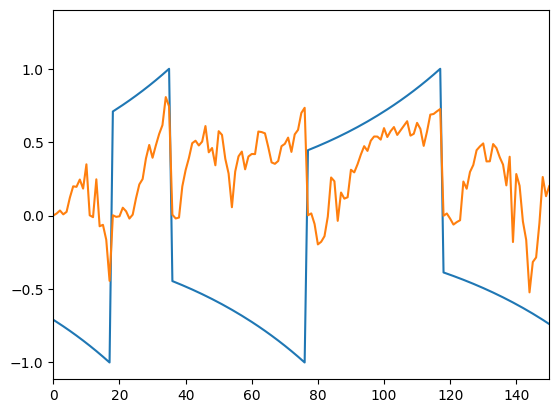

In [14]:
plt.plot(labels_tens)
plt.plot(values_tens)
plt.xlim([0, 150])

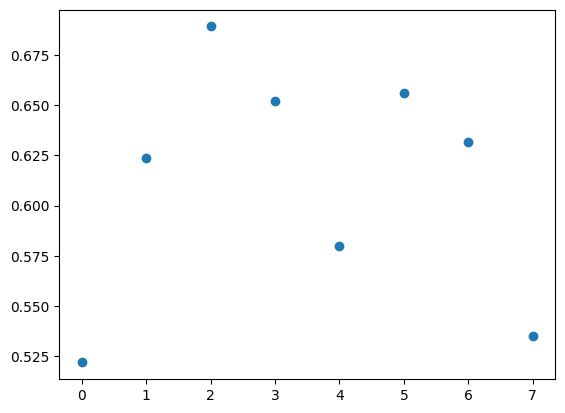

In [23]:
plt.scatter(range(len(validation_error_list)), validation_error_list)
plt.show()

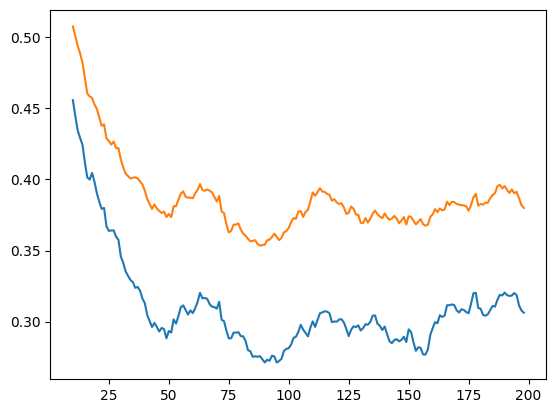

In [40]:
av_window = 20
plt.plot(range(av_window//2, len(val_median_list) - av_window//2), [np.nanmean(val_median_list[i:(i+av_window)]) for i in range(len(val_median_list) - av_window)], label='median')
plt.plot(range(av_window//2, len(val_mean_list) - av_window//2), [np.nanmean(val_mean_list[i:(i+av_window)]) for i in range(len(val_mean_list) - av_window)], label='mean')
        
plt.show()

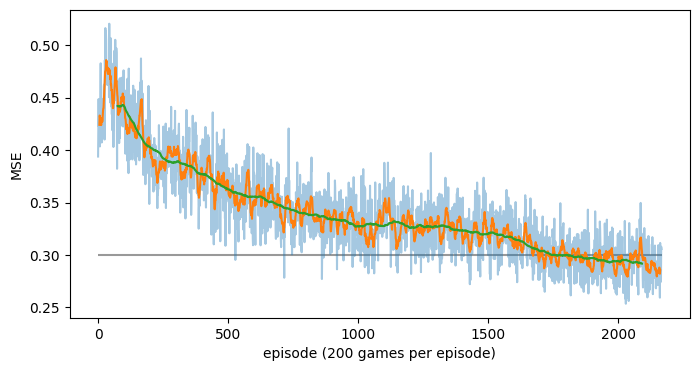

In [41]:
error_hist_v27 = torch.load('error_hist MC v27')
av_windows = [10, 150]
plt.figure(figsize=(8, 4))
plt.hlines(0.3, xmin=0, xmax=len(error_hist_v27), color='black', alpha=0.4)
plt.plot(error_hist_v27, alpha=0.4)
for av in av_windows:
    plt.plot(range(av//2, len(error_hist_v27)-av//2), [np.mean(error_hist_v27[i:i+av]) for i in range(len(error_hist_v27) - av)], alpha=1)
plt.xlabel('episode (200 games per episode)')
plt.ylabel('MSE')
# plt.xlim([2000, 2200])
plt.show()
# plt.plot(error_hist_v27, alpha=0.4)

In [37]:
print(len(error_hist_v27))

2146


In [46]:
epsilon = 2
test_list = [1, 2, 3, 4, 5, 6]
norm_list = [i-np.mean(test_list) for i in test_list]
scaled_norm_list = [(i-np.mean(test_list))*epsilon for i in test_list]

exp_list= [np.exp(i) for i in norm_list]
scaled_exp_list= [np.exp(i) for i in scaled_norm_list]

softmax = [i/(np.sum(exp_list)) for i in exp_list]
scaled_softmax = [i/(np.sum(scaled_exp_list)) for i in scaled_exp_list]

print(softmax)
print(scaled_softmax)


[0.00426977854528211, 0.011606461431184656, 0.03154963320110002, 0.08576079462509835, 0.23312200962361299, 0.6336913225737218]
[3.925595860610245e-05, 0.00029006448035779047, 0.0021433027176708816, 0.015836984017860663, 0.11702036334584057, 0.864670029479664]
